# **드라이브 및 경로 설정**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/KDT/세미프로젝트/최종_전처리'
# %cd '/content/drive/MyDrive/DATA'

/content/drive/MyDrive/KDT/세미프로젝트/최종_전처리


# **라이브러리**

In [ ]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# WordCloud
from wordcloud import WordCloud

import re
import nltk
import csv

In [ ]:
# mecab 설치
!pip install python-mecab-ko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 40.2 MB/s eta 0:00:00


In [ ]:
from mecab import MeCab
mecab = MeCab()

In [ ]:
# 한글 형태소 분석기 설치
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-06-16 06:23:44--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-06-16 06:23:44--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf379fde464255320a9746b4815.dl.dropboxusercontent.com/cd/0/get/B-E2CReWMGaDOHyV8zzdhBrSS4kFUs_e2beydwSgjfWuIa5u0kKZbzmA-OC-Fe_lvMJaKAhHfoSDPb8OJK-xLmmFQyfMQ4kvSMQIJTpXjMWqNGyNgbAnc3DaCZ7whawtVf6fo8EmyjwBDjXuy3S1YGHmNyCzcC6_-wraBJHhd6GI6RC_q6EwhwyaoMK6DADJVn0/file?dl=1# [following]
--2023-06-16 06:23:45--  https://ucf379fde464255320a9746b4815.dl.dropboxusercontent.com/cd/0/get/B-E2CReWMGaD

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Okt, Hannanum
import konlpy

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **크롤링 데이터 전처리**

In [ ]:
file_path = '/content/drive/MyDrive/KDT/세미프로젝트/최종_전처리/한경_삼성전자_이정한.csv'
data = pd.read_csv(file_path, index_col = 0)

# 데이터 확인
data[:5]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,삼성전자 업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,삼성전자 뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,삼성전자 4Q22 잠정실적 리뷰,1
3,2022-11-21,삼성전자,005930,삼성전자 경쟁력 격차 복구 여부에 주목 저점 분할 매수 권고,1
4,2022-07-29,삼성전자,005930,삼성전자 시험은 어렵지만 변별력은 높아진다,1


In [ ]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   작성일     237 non-null    object
 1   종목명     236 non-null    object
 2   종목코드    237 non-null    object
 3   제목      236 non-null    object
 4   label   237 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.1+ KB


## 삼성전자 데이터 추출

In [ ]:
# 종목명 :  삼성전자 외 제거
data.drop(index = data[data['종목명'] != '삼성전자'].index , axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   작성일     230 non-null    object
 1   종목명     230 non-null    object
 2   종목코드    230 non-null    object
 3   제목      230 non-null    object
 4   label   230 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 10.8+ KB


## 누락 데이터 확인

In [ ]:
# 누락데이터 확인
print('작성일\n',data['작성일'].isnull().value_counts())
print('-'*80)
print('종목명\n',data['종목명'].isnull().value_counts())
print('-'*80)
print('종목코드\n',data['종목코드'].isnull().value_counts())
print('-'*80)
print('제목\n',data['제목'].isnull().value_counts())
print('-'*80)
print('label\n',data['label'].isnull().value_counts())

# 누락 처리 완료
data[:5]

작성일
 False    230
Name: 작성일, dtype: int64
--------------------------------------------------------------------------------
종목명
 False    230
Name: 종목명, dtype: int64
--------------------------------------------------------------------------------
종목코드
 False    230
Name: 종목코드, dtype: int64
--------------------------------------------------------------------------------
제목
 False    230
Name: 제목, dtype: int64
--------------------------------------------------------------------------------
label
 False    230
Name: label, dtype: int64


,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,삼성전자 업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,삼성전자 뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,삼성전자 4Q22 잠정실적 리뷰,1
3,2022-11-21,삼성전자,005930,삼성전자 경쟁력 격차 복구 여부에 주목 저점 분할 매수 권고,1
4,2022-07-29,삼성전자,005930,삼성전자 시험은 어렵지만 변별력은 높아진다,1


## '삼성전자' 불용어 단어 제거

In [ ]:
# '삼성전자' 단어 제거
data['제목'] = [sentence.replace('삼성전자', '') for sentence in data['제목']]

# 결과 확인
print('삼성전자'in data['제목'].values)

False


## 단어가 없는 데이터 제거

In [ ]:
# 데이터 확인
print('단어가 없는 문장 제거 전 :',data[data['제목']==' '].index)

# 삭제하기
data.drop(data[data['제목']==' '].index, inplace = True)
data.reset_index(drop = True, inplace=True)

# 결과 확인
print('단어가 없는 문장 제거 후 :',data[data['제목']==' '].index)

단어가 없는 문장 제거 전 : Int64Index([100, 120, 124, 132], dtype='int64')
단어가 없는 문장 제거 후 : Int64Index([], dtype='int64')


# 크롤링 데이터 탐색

## 문장의 길이 확인 및 시각화

In [ ]:
### 전체 데이터의 각 '제목' 길이 확인 -> 5개만 확인
data_length = data['제목'].astype(str).apply(len)
data_length.head()

0    19
1    16
2    13
3    29
4    19
Name: 제목, dtype: int64

Text(0, 0.5, 'Number of title')

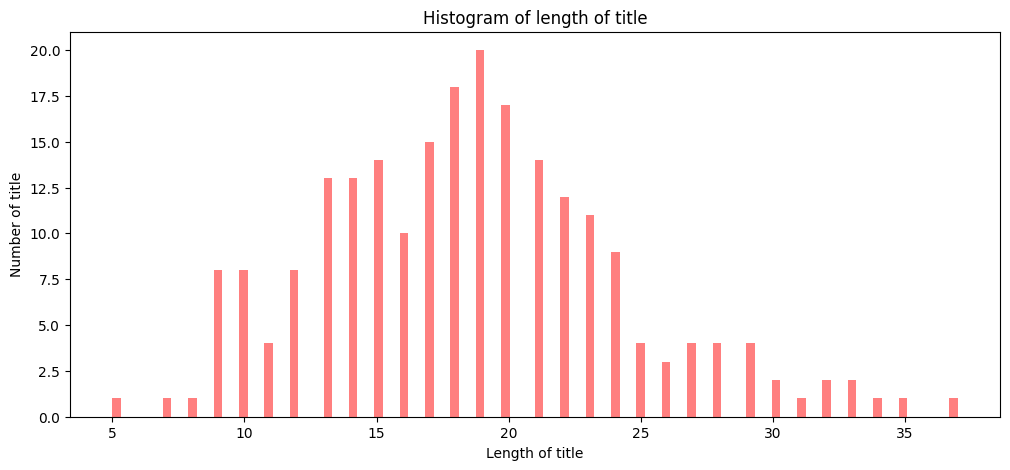

In [ ]:
### 각 '제목'의 길이 분포 시각화
plt.figure(figsize=(12, 5))
plt.hist(data_length, bins=100, alpha=0.5, color='r', label='word')
plt.title('Histogram of length of title')
plt.xlabel('Length of title')
plt.ylabel('Number of title')

## 문장별 단어 개수 확인 및 시각화

In [ ]:
# 각 문장별 단어 개수 확인
word_counts = data['제목'].apply(lambda x: len(x.split()))

print(f'자료형 = {type(word_counts)}')
print('-'*80)
print(f'결과 확인\n{word_counts}')
print('-'*80)
print(f'단어 개수 빈도수\n{word_counts.value_counts().sort_index()}')
print('-'*80)
print(f'단어 개수 빈도수 비율\n{word_counts.value_counts(normalize=True).sort_index()}')

자료형 = <class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
결과 확인
0      4
1      4
2      3
3      9
4      4
      ..
221    3
222    2
223    4
224    6
225    7
Name: 제목, Length: 226, dtype: int64
--------------------------------------------------------------------------------
단어 개수 빈도수
1     2
2    10
3    40
4    54
5    56
6    37
7    19
8     6
9     2
Name: 제목, dtype: int64
--------------------------------------------------------------------------------
단어 개수 빈도수 비율
1    0.008850
2    0.044248
3    0.176991
4    0.238938
5    0.247788
6    0.163717
7    0.084071
8    0.026549
9    0.008850
Name: 제목, dtype: float64


In [ ]:
# 문장별 단어 개수 통계량
pd.Series(data = word_counts).describe()

count    226.000000
mean       4.685841
std        1.509517
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: 제목, dtype: float64

In [ ]:
data

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1
3,2022-11-21,삼성전자,005930,경쟁력 격차 복구 여부에 주목 저점 분할 매수 권고,1
4,2022-07-29,삼성전자,005930,시험은 어렵지만 변별력은 높아진다,1
...,...,...,...,...,...
221,2018-06-25,삼성전자,005930,2Q18 Preview 숨고르기,0
222,2018-06-20,삼성전자,005930,시선을 3분기로,0
223,2018-06-20,삼성전자,005930,신규 아이폰은 여전히 기회다,0
224,2018-06-11,삼성전자,005930,전자도 어쩔 수 없는 스마트폰 시장,0


### WordCloud

In [ ]:
# 한글 나눔 폰트 다운 받기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

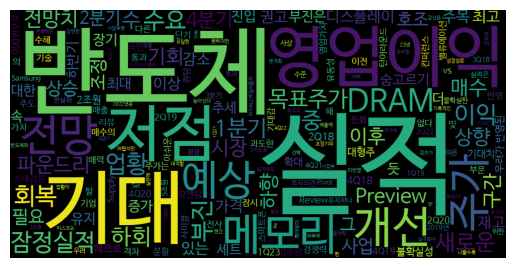

In [ ]:
# WordCloud를 이용한 문장별 단어 빈도수 시각화

from wordcloud import WordCloud

# '제목' 컬럼 -> 문자열 데이터로 변환
str_title = ""
for review in data['제목'].values:
    str_title += review

#객체 생성
wordcloud = WordCloud(
    font_path='NanumBarunGothic',
    width=1000,
    height=500
)

#이미지 생성
wordcloud.generate(str_title)

#이미지 출력
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **조별 전처리**

## a조 전처리

In [ ]:
# a조 데이터 생성
a_data = data.copy()
a_data[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1


### 전처리 함수 생성

In [ ]:
### 한글과 공백을 제외한 나머지 문자, 숫자, 기호 제거 패턴 설정
a_pattern = '[^가-힣 ]'

In [ ]:
# 전처리 함수 정의(1) : Okt

def a_preprocessing_okt(title, okt, remove_stopwords=False):
    # 1. 한글 및 공백을 제외한 문자, 숫자, 기호 등 모두 제거
    title_text = re.sub('[^가-힣 ]', "", title)

    # 2. okt 객체를 활용해서 형태소 단위로 나눈다
    word_title = okt.morphs(title_text, stem=True)

    if remove_stopwords:
        # 3. 불용어 제거
        clean_words = []

        for token in word_title:
            if len(token) > 1:
                clean_words.append(token)

        clean_title = ' '.join(clean_words)

    else:
        clean_title = ' '.join(word_title)

    return clean_title

In [ ]:
# 전처리 함수 정의 : Mecab

def a_preprocessing_mecab(title, mecab, remove_stopwords=False):
    # 1. 한글 및 공백을 제외한 문자, 숫자, 기호 등 모두 제거
    title_text = re.sub('[^가-힣 ]', "", title)

    # 2. mecab 객체를 활용해서 형태소 단위로 나눈다
    word_title = mecab.morphs(title_text)

    if remove_stopwords:
        # 3. 불용어 제거
        clean_words = []

        for token in word_title:
            if len(token) > 1:
                clean_words.append(token)

        clean_title = ' '.join(clean_words)

    else:
        clean_title = ' '.join(word_title)

    return clean_title

## b조 전처리

In [ ]:
# b조 데이터 생성
b_data = data.copy()
b_data[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1


### '삼성' 불용어 단어 제거

In [ ]:
# '삼성' 단어 제거
b_data['제목'] = [sentence.replace('삼성전자', '') for sentence in b_data['제목']]

# 결과 확인
print('삼성'in b_data['제목'].values)

False


### 문장 부호 제거

In [ ]:
# 문장 부호 제거 패턴 설정
b_pattern = "[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]"

b_data_clean = list(b_data['제목'].apply(lambda x: re.sub(b_pattern, '', x)))
print('문장 개수 :',len(b_data_clean))
print('문장 부호 제거 문장 :',b_data_clean[:3],'\n')

b_data['제목'] = b_data_clean.copy()
print(b_data[:3],'\n')

# 결과 확인 예시
print('문장부호 제거 확인 :','?' in b_data['제목'].values)

문장 개수 : 226
문장 부호 제거 문장 : [' 업황이 나쁠수록 감산은 확대된다 ', ' 뻔하지만 당연한 최고의 선택', ' 4Q22 잠정실적 리뷰'] 

          작성일   종목명    종목코드                   제목  label
0  2023-04-10  삼성전자  005930   업황이 나쁠수록 감산은 확대된다       1
1  2023-03-15  삼성전자  005930      뻔하지만 당연한 최고의 선택      1
2  2023-01-09  삼성전자  005930         4Q22 잠정실적 리뷰      1 

문장부호 제거 확인 : False


### 전처리 함수 생성

In [ ]:
# 전처리 함수 정의 : Okt

def b_preprocessing_okt(title, okt, remove_stopwords=False):

    # 1. okt 객체를 활용해서 형태소 단위로 나눈다
    word_title = okt.morphs(title, stem=True)

    if remove_stopwords:
        # 2. 불용어 제거
        clean_words = []

        for token in word_title:
            if len(token) > 1:
                clean_words.append(token)

        clean_title = ' '.join(clean_words)
    else:
        clean_title = ' '.join(word_title)

    return clean_title

In [ ]:
### 전처리 함수 정의 : Mecab

def b_preprocessing_mecab(title, mecab, remove_stopwords=False):
    # 2. mecab 객체를 활용해서 형태소 단위로 나눈다
    word_title = mecab.morphs(title)

    if remove_stopwords:
        # 3. 불용어 제거
        clean_words = []

        for token in word_title:
            if len(token) > 1:
                clean_words.append(token)

        clean_title = ' '.join(clean_words)
    else:
        clean_title = ' '.join(word_title)

    return clean_title

## c조 전처리

In [ ]:
# c조 데이터 생성
c_data = data.copy()
c_data[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1


### 불용어 제거 함수 생성


In [ ]:
import nltk
import csv
import pandas as pd

# 불용어 리스트 생성
f = open('stop_words.txt', encoding = 'utf8')
reader = csv.reader(f)
stopwords = []
for i in reader:
    stopwords.append(i)
f.close()

# 2차원으로 반환되므로 1차원으로 변환
stopword_list = np.concatenate(stopwords).tolist()
print(stopword_list)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

In [ ]:
# 불용어 체크
'은' in stopword_list

True

In [ ]:
# 불용어 제거 함수 생성

def c_remove_stopwords(morphs):
    clean_word = []
    clean_list = []
    for word in morphs:
        #print('불용어 제거 문장\n',word)
        for token in word:
            if token not in stopword_list:
                clean_word.append(token)

        clean_list.append(clean_word)
        clean_word = []
    return clean_list

### 문장화 함수 생성

In [ ]:
# 문장화 함수 생성
def c_make_sentence(clean_list):
    sentence_list = []
    for row in clean_list:
        sentence_list.append(' '.join(row))
    return sentence_list

**<공통 전처리>**

1. 크롤링 데이터에서 '종목'의 value가 '삼성전자'가 아닌 행 제거

2. '제목'의 value에서 '삼성전자' 단어 제거

3. 누락 데이터 확인

4. 누락이 아니면서 단어가 존재하지 않는 행 제거

**<조별 전처리>**

a조

불용어 : 한글과 공백이 아닌 나머지 문자, 숫자, 기호 제거 -> Okt, mecab 형태소 분석기별 전처리 함수

(a_preprocessing_okt, a_preprocessing_mecab) 생성 -> 형태소 분석/빈 문장 제거/불용어 제거

---

b조

 불용어 : 문장 부호 제거 -> 형태소 분석기 사용 전 불용어 '삼성' 제거 -> Okt, mecab 형태소 분석기별 전처리 함수

 (b_preprocessing_okt, b_preprocessing_mecab) 생성 -> 형태소 분석/빈 문장 제거

---

c조

불용어 : 자체 불용어 제거 -> 불용어 txt파일을 작성해 자체 불용어 리스트 생성 -> 불용어 제거 함수

(c_remove_stopwords) 생성 -> 형태소 분석 후 불용어 제거 -> 문장화 함수(c_make_sentence) 생성 -> 문장화


# 최종 사용 모델

## **RandomForest : b_okt_keras**

데이터 : b_data

b_data -> okt 형태소 분석 -> keras 정수 인코딩 -> train / test 분리

### Okt 형태소 분석

In [ ]:
# '제목' 컬럼에 대해서 Okt 전처리 함수 실행

# okt 객체 생성
okt = Okt()

# 함수 실행
b_clean_title_okt = []

for title in b_data['제목'].values:
    clean_title = b_preprocessing_okt(title, okt, remove_stopwords=True)
    b_clean_title_okt.append(clean_title)
b_clean_title_okt[:3]

['업황 나쁘다 감산 확대 되다', '뻔하다 당연하다 최고 선택', '22 잠정 실적 리뷰']

In [ ]:
# 데이터 프레임 추가
b_data_okt = b_data.copy()
b_data_okt['제목'] = b_clean_title_okt.copy()
b_data_okt[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황 나쁘다 감산 확대 되다,1
1,2023-03-15,삼성전자,005930,뻔하다 당연하다 최고 선택,1
2,2023-01-09,삼성전자,005930,22 잠정 실적 리뷰,1


In [ ]:
# 리뷰의 길이가 0보다 큰 데이터 추출
b_okt_bool = b_data_okt['제목'].apply(lambda x:len(x)>0).values

b_okt_clean = b_data_okt.loc[b_okt_bool, :]
b_okt_clean.reset_index(drop=True, inplace=True)

# 결과 확인하기
np.unique(b_okt_clean['제목'].apply(lambda x:len(x)>0).values)

array([ True])

In [ ]:
b_okt_clean

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황 나쁘다 감산 확대 되다,1
1,2023-03-15,삼성전자,005930,뻔하다 당연하다 최고 선택,1
2,2023-01-09,삼성전자,005930,22 잠정 실적 리뷰,1
3,2022-11-21,삼성전자,005930,경쟁력 격차 복구 여부 주목 분할 매수 권고,1
4,2022-07-29,삼성전자,005930,시험 어렵다 변별 높아지다,1
...,...,...,...,...,...
221,2018-06-25,삼성전자,005930,18 Preview 고르다,0
222,2018-06-20,삼성전자,005930,시선 3분 기로,0
223,2018-06-20,삼성전자,005930,신규 아이폰 여전하다 기회,0
224,2018-06-11,삼성전자,005930,전자 어쩔 없다 스마트폰 시장,0


### Keras

In [ ]:
### 1차원 리스트 형태로 반환
b_okt_list = list(b_okt_clean['제목'].values)

In [ ]:
# 토큰화

# tokenizer 객체 생성
b_okt_tokenizer = tf.keras.preprocessing.text.Tokenizer()

# 단어 사전 생성
b_okt_tokenizer.fit_on_texts(b_okt_list)

# 정수 인코딩 실행
okt_encoding = b_okt_tokenizer.texts_to_sequences(b_okt_list)
print(f"정수 인코딩 결과{okt_encoding[:2]}")
print('-'*80)

# 단어 사전 형태
word_vocab = b_okt_tokenizer.word_index
print(f"단어 사전 확인{word_vocab}")
print('-'*80)

#문장 길이 맞추기

# 문장 최대 길이
max_length = 9

# 데이터 벡터화
b_okt_vec = tf.keras.utils.pad_sequences(okt_encoding, maxlen=max_length, padding='post') # padding='post' --> 문서의 뒤에 0을 채움
print(f"데이터 벡터화 결과\n {b_okt_vec[:2]}")
print('-'*80)

# label 컬럼 --> 넘파이 배열로 변환
b_okt_labels = np.array(b_okt_clean['label'])
print(f"label컬럼 배열 변환 결과\n{b_okt_labels}")

정수 인코딩 결과[[20, 179, 97, 56, 8], [180, 181, 57, 182]]
--------------------------------------------------------------------------------
단어 사전 확인{'실적': 1, '반도체': 2, '이익': 3, '주가': 4, '영업': 5, '기대': 6, '개선': 7, '되다': 8, '메모리': 9, '전망': 10, '하다': 11, '예상': 12, '으로': 13, '부진': 14, '수요': 15, '19': 16, '잠정': 17, '회복': 18, '18': 19, '업황': 20, '사업': 21, 'dram': 22, '우려': 23, '하향': 24, '매수': 25, '20': 26, '시장': 27, '22': 28, '1분': 29, '반영': 30, '파운드리': 31, '21': 32, '있다': 33, '상승': 34, '4분': 35, '목표': 36, '새롭다': 37, '기회': 38, '구간': 39, '디스플레이': 40, '호조': 41, '가치': 42, '망치': 43, '대감': 44, 'preview': 45, '이후': 46, '상향': 47, '조정': 48, '세트': 49, '좋다': 50, '3분': 51, '유지': 52, '에서': 53, '2분': 54, '투자': 55, '확대': 56, '최고': 57, '필요': 58, '부문': 59, '감소': 60, '보다': 61, '가격': 62, '장기': 63, '하반기': 64, '이다': 65, '않다': 66, '대치': 67, '16': 68, '격차': 69, '주목': 70, '권고': 71, '이상': 72, 'it': 73, '매출': 74, '재고': 75, '사이클': 76, '모멘텀': 77, '고르다': 78, '반등': 79, '주도': 80, '진입': 81, '최대': 82, '둔화': 83, '증가': 84, '대한': 8

### train / test 생성

In [ ]:
### train_test_split
from sklearn.model_selection import train_test_split

# 평가용과 테스트 세트로 나누기
X_train_okt, X_test_okt, y_train_okt, y_test_okt = train_test_split(b_okt_clean.제목, b_okt_clean.label, test_size=0.2, random_state=11)

# 출력을 확인하기 위해 데이터 개수 출력
print("Train set 개수:", len(X_train_okt))
print("Test set 개수:", len(X_test_okt))

Train set 개수: 180
Test set 개수: 46


In [ ]:
### b_y_train / b_y_test
b_y_train = 'b_y_train.csv'
b_y_test = 'b_y_test.csv'

b_y_train_df = pd.DataFrame(y_train_okt)
b_y_train_df.to_csv(b_y_train, index=False)
b_y_test_df = pd.DataFrame(y_test_okt)
b_y_test_df.to_csv(b_y_test, index=False)

In [ ]:
train_index = list(X_train_okt.index)
test_index = list(X_test_okt.index)

In [ ]:
### b_mecab_keras_X_train / b_mecab_keras_X_test
b_okt_keras_X_train_array = b_okt_vec[train_index]
b_okt_keras_X_test_array = b_okt_vec[test_index]
b_okt_keras_X_train = 'b_okt_keras_X_train.csv'
b_okt_keras_X_test = 'b_okt_keras_X_test.csv'
b_okt_keras_X_train_df = pd.DataFrame(b_okt_keras_X_train_array)
b_okt_keras_X_train_df.to_csv(b_okt_keras_X_train, index=False)
b_okt_keras_X_test_df = pd.DataFrame(b_okt_keras_X_test_array)
b_okt_keras_X_test_df.to_csv(b_okt_keras_X_test, index=False)

## **AdaBoost : b_mecab_keras**

데이터 : b_data

b_data -> mecab 형태소 분석 -> keras 정수 인코딩 -> train / test 분리

### Mecab 형태소 분석

In [ ]:
# '제목' 컬럼에 대해서 Mecab 전처리 함수 실행

# mecab 객체 생성
mecab = MeCab()

# 함수 실행
b_clean_title_mecab = []

for title in b_data['제목'].values:
    clean_title = b_preprocessing_mecab(title, mecab, remove_stopwords=True)
    b_clean_title_mecab.append(clean_title)
b_clean_title_mecab[:3]

['나쁠 수록 감산 확대 된다', '뻔하 지만 당연 최고 선택', '22 잠정 실적 리뷰']

In [ ]:
# 데이터 프레임 추가
b_data_mecab = b_data.copy()
b_data_mecab['제목'] = b_clean_title_mecab.copy()
b_data_mecab[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,나쁠 수록 감산 확대 된다,1
1,2023-03-15,삼성전자,005930,뻔하 지만 당연 최고 선택,1
2,2023-01-09,삼성전자,005930,22 잠정 실적 리뷰,1


In [ ]:
# 리뷰의 길이가 0보다 큰 데이터 추출
b_mecab_bool = b_data_mecab['제목'].apply(lambda x:len(x)>0).values

b_mecab_clean = b_data_mecab.loc[b_mecab_bool, :]
b_mecab_clean.reset_index(drop=True, inplace=True)

# 결과 확인하기
np.unique(b_mecab_clean['제목'].apply(lambda x:len(x)>0).values)

array([ True])

In [ ]:
b_mecab_clean

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,나쁠 수록 감산 확대 된다,1
1,2023-03-15,삼성전자,005930,뻔하 지만 당연 최고 선택,1
2,2023-01-09,삼성전자,005930,22 잠정 실적 리뷰,1
3,2022-11-21,삼성전자,005930,경쟁력 격차 복구 여부 주목 저점 분할 매수 권고,1
4,2022-07-29,삼성전자,005930,시험 어렵 지만 변별력 진다,1
...,...,...,...,...,...
221,2018-06-25,삼성전자,005930,18 Preview 고르,0
222,2018-06-20,삼성전자,005930,시선 분기,0
223,2018-06-20,삼성전자,005930,신규 아이폰 여전히 기회,0
224,2018-06-11,삼성전자,005930,전자 어쩔 스마트폰 시장,0


### Keras

In [ ]:
### 1차원 리스트 형태로 반환
b_mecab_list = list(b_mecab_clean['제목'].values)

In [ ]:
# 토큰화

# tokenizer 객체 생성
b_mecab_tokenizer = tf.keras.preprocessing.text.Tokenizer()

# 단어 사전 생성
b_mecab_tokenizer.fit_on_texts(b_mecab_list)

# 정수 인코딩 실행
mecab_encoding = b_mecab_tokenizer.texts_to_sequences(b_mecab_list)
print(f"정수 인코딩 결과{mecab_encoding[:2]}")
print('-'*80)

# 단어 사전 형태
word_vocab = b_mecab_tokenizer.word_index
print(f"단어 사전 확인{word_vocab}")
print('-'*80)

#문장 길이 맞추기

# 문장 최대 길이
max_length = 9

# 데이터 벡터화
b_mecab_vec = pad_sequences(mecab_encoding, maxlen=max_length, padding='post') # padding='post' --> 문서의 뒤에 0을 채움
print(f"데이터 벡터화 결과\n {b_mecab_vec[:2]}")
print('-'*80)

# label 컬럼 --> 넘파이 배열로 변환
b_mecab_labels = np.array(b_mecab_clean['label'])
print(f"label컬럼 배열 변환 결과\n{b_mecab_labels}")

정수 인코딩 결과[[160, 161, 89, 51, 63], [162, 38, 163, 52, 164]]
--------------------------------------------------------------------------------
단어 사전 확인{'실적': 1, '반도체': 2, '분기': 3, '이익': 4, '영업': 5, '전망': 6, '기대': 7, '개선': 8, '주가': 9, '메모리': 10, '저점': 11, '예상': 12, '잠정': 13, '으로': 14, '부진': 15, '수요': 16, '19': 17, '18': 18, '회복': 19, '사업': 20, 'dram': 21, '우려': 22, '하향': 23, '매수': 24, '반영': 25, '20': 26, '시장': 27, '에서': 28, '22': 29, '파운드리': 30, '21': 31, '하회': 32, '상승': 33, '표주': 34, '새로운': 35, '기회': 36, '구간': 37, '지만': 38, '디스플레이': 39, '호조': 40, '가치': 41, 'preview': 42, '이후': 43, '상향': 44, '조정': 45, '장기': 46, '세트': 47, '유지': 48, '투자': 49, '확실': 50, '확대': 51, '최고': 52, '필요': 53, '부문': 54, '23': 55, '감소': 56, '보다': 57, '기대감': 58, '하반기': 59, '기대치': 60, '16': 61, '호주': 62, '된다': 63, '격차': 64, '주목': 65, '권고': 66, '이상': 67, 'it': 68, '재고': 69, '사이클': 70, '가격': 71, '고르': 72, '주도': 73, '진입': 74, '최대': 75, '둔화': 76, '증가': 77, '대한': 78, '추세': 79, '일까': 80, '통과': 81, '다운': 82, '바텀': 83, '바닥': 84, '

### train / test 생성

In [ ]:
### train_test_split
from sklearn.model_selection import train_test_split

# 평가용과 테스트 세트로 나누기
X_train_mecab, X_test_mecab, y_train_mecab, y_test_mecab = train_test_split(b_mecab_clean.제목, b_mecab_clean.label, test_size=0.2, random_state=11)

# 출력을 확인하기 위해 데이터 개수 출력
print("Train set 개수:", len(X_train_mecab))
print("Test set 개수:", len(X_test_mecab))

Train set 개수: 180
Test set 개수: 46


In [ ]:
### b_y_train / b_y_test
b_y_train = 'b_y_train.csv'
b_y_test = 'b_y_test.csv'

b_y_train_df = pd.DataFrame(y_train_mecab)
b_y_train_df.to_csv(b_y_train, index=False)
b_y_test_df = pd.DataFrame(y_test_mecab)
b_y_test_df.to_csv(b_y_test, index=False)

In [ ]:
train_index = list(X_train_mecab.index)
test_index = list(X_test_mecab.index)

In [ ]:
### b_mecab_keras_X_train / b_mecab_keras_X_test
b_mecab_keras_X_train_array = b_mecab_vec[train_index]
b_mecab_keras_X_test_array = b_mecab_vec[test_index]
b_mecab_keras_X_train = 'b_mecab_keras_X_train.csv'
b_mecab_keras_X_test = 'b_mecab_keras_X_test.csv'
b_mecab_keras_X_train_df = pd.DataFrame(b_mecab_keras_X_train_array)
b_mecab_keras_X_train_df.to_csv(b_mecab_keras_X_train, index=False)
b_mecab_keras_X_test_df = pd.DataFrame(b_mecab_keras_X_test_array)
b_mecab_keras_X_test_df.to_csv(b_mecab_keras_X_test, index=False)

## **Naive Bayes : SentenceBert**

In [ ]:
sbert = data.copy()

데이터 : sbert

sbert -> 형태소 분석 -> Sentencebert -> train / test 분리

#### SentenceBert

✅ ko-sroberta-multitask 사전모델을 사용

=> 문장이나 문단을 768차원의 dense vector로 바꿔줌

In [ ]:
### Snentence Transformer 설치 및 실행
!pip install -q -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00


In [ ]:
### 모델 객체 생성
from sentence_transformers import SentenceTransformer

model_nb = SentenceTransformer('jhgan/ko-sroberta-multitask')


In [ ]:
### 임베딩을 위해 제목 데이터 하나의 리스트로 담기
title_sbert_list = sbert['제목'].tolist()

print(title_sbert_list)

[' 업황이 나쁠수록 감산은 확대된다 ', ' 뻔하지만 당연한 최고의 선택', ' 4Q22 잠정실적 리뷰', ' 경쟁력 격차 복구 여부에 주목 저점 분할 매수 권고', ' 시험은 어렵지만 변별력은 높아진다', ' 1분기 디스플레이 기대 이상', ' 메모리 업황 개선 본격화', ' 리스크는 주가에 반영 성장성은 미반영', ' IT Set 실판매 강도에 주목 필요', ' 반도체 업종 조정기의 끝자락', ' 2022년은 퀀텀 점프가 될 한 해', ' 반도체와 모바일 사업부문 실적 호조', ' 23년 연간 매출액 300조원', ' 파운드리 사업부 가치 반영', ' 3Q21 하이퍼스케일러들의 서버 DRAM 재고 감소 예상', ' 2Q21 영업이익 11 3조원 전망', ' TSMC 에 대적할 수 있는 유일한 반도체 기업', ' 1Q21 영업이익 9 0조원 전망', ' 주가는 실적보다 빠르다', ' 4 분기는 이전 전망치 하회 기대감은 최고', ' 기대 이하 실적에도 유동성 슈퍼사이클로 기록적인 주가 상승', ' Re rating 의 모멘텀이 시작된다', ' 삼 성전자 4Q20 Preview', ' 500조 그 이후', ' 4분기는 이전 전망치 하회 기대감은 최고', ' 목표주가 111 000원으로 상향', ' 반도체 업황 회복과 강력한 유동성 효과', ' DRAM 가격 전망치 상향 조정', ' 빨리 봄이 온다', ' 달러 약세와 유럽 락다운 영향으로 4Q이익은 숨고르기', ' 메모리 업황 반등이 빨라진다', ' NAND 산업의 통합을 주도', ' 기술 혁신이 새로운 역사를 만든다', ' DRAM 장기 호황 사이클 진입', ' 메모리 파운드리 쌍끌이 개선', ' 단기 실적 부진은 저점 매수의 기회', ' DRAM 가격 반등 최대 수혜', ' 낮아지는 DRAM 재고 높아지는 기대감', ' 4Q20 실적 둔화는 저점 매수의 기회', ' 21 년 반도체 Capex Cycle 주도권 확보', ' 반도체 출하량과 TV 판매량 호조', ' 실적 개선과 우선주 매력 증가', ' 반도체

In [ ]:
### 한국어 문장 임베딩 실행
embeddings_nb = model_nb.encode(title_sbert_list)

print(embeddings_nb[0])

[ 2.20162705e-01  3.27912062e-01 -4.10323776e-02 -6.14019454e-01
  1.73529014e-01  4.72100377e-01  4.20970410e-01  1.66724026e-01
  3.71565223e-01  3.41906637e-01 -9.89905521e-02  6.58148527e-01
 -3.30716580e-01  6.17006123e-01 -7.04108000e-01  1.93981707e-01
  4.58276004e-01  1.61158100e-01  1.54151455e-01  3.44964743e-01
  7.94273794e-01 -1.69411957e-01  5.79866469e-01  2.92850792e-01
  5.15554659e-02 -3.73201489e-01 -2.22568139e-01  1.91794172e-01
 -2.40944847e-01  8.70341122e-01  7.16740787e-01  3.30557823e-01
 -2.43274450e-01  3.55785638e-02  1.28826499e-03 -3.21587294e-01
  2.90700406e-01  4.78428118e-02  1.18290879e-01  1.30812526e-01
  3.31136554e-01  9.77621377e-01  1.93835199e-01  5.14059007e-01
  5.40829957e-01 -2.89701492e-01  3.72925133e-01  9.13876370e-02
 -5.33383310e-01 -1.14219166e-01 -1.04553795e+00  1.68465436e-01
 -6.67249858e-01 -3.63633871e-01  6.03444874e-01  6.31719053e-01
 -1.60162896e-02  1.86201613e-02 -2.54968137e-01  6.53014630e-02
  4.66474026e-01 -3.84227

In [ ]:
### df 형태로 저장
label_sbert_list = sbert['label'].tolist()
print(label_sbert_list)

# embeddings과 label_list를 DataFrame으로 변환
embedding_sbert_df = pd.DataFrame(embeddings_nb, columns=['{}'.format(i) for i in range(embeddings_nb.shape[1])])
label_sbert_df = pd.DataFrame(label_sbert_list, columns=['label'])

# embeddings과 label을 포함한 새로운 DataFrame 생성
SBERT_data = pd.concat([embedding_sbert_df, label_sbert_df], axis=1)

SBERT_data

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,0.220163,0.327912,-0.041032,-0.614019,0.173529,0.472100,0.420970,0.166724,0.371565,0.341907,...,0.133388,-0.245910,0.484547,-0.805565,0.535417,-0.137616,0.007567,-0.299099,0.115374,1
1,-0.076253,-0.106268,0.036245,-0.069467,0.312401,-0.959825,-0.011462,-0.379928,0.612604,-0.000974,...,-0.404586,0.162942,0.301141,0.315553,0.143952,-0.821238,0.232622,-0.124869,-0.186256,1
2,-0.496213,0.058317,0.179334,-0.152657,0.569481,-0.512668,0.656777,-0.378930,-0.014966,-0.276707,...,-0.405618,-0.094722,0.248595,-0.072523,-0.331172,-0.669527,-0.338673,-0.011212,0.223342,1
3,0.002180,-0.222144,0.145472,-0.540390,0.394820,-0.028862,0.297937,-0.322351,-0.357989,-0.355404,...,0.247064,-0.219848,0.618800,0.154916,0.315750,-0.264728,-0.006694,-0.325612,0.080624,1
4,-0.369198,-0.293183,0.122002,-0.878650,0.152597,0.242256,-0.456647,0.430816,0.713524,-0.864803,...,0.495256,-0.017128,-0.847749,-0.154657,0.145573,0.583433,0.237729,0.421992,-0.365573,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.284026,-0.595451,0.316517,0.459246,0.202843,-0.129256,-0.011239,0.168942,-0.474750,-0.025613,...,-0.470239,-0.266403,0.130466,-0.207896,-0.253958,0.147550,-0.105082,-0.425274,-0.178162,0
222,0.688137,-0.149675,0.167048,-0.500861,-0.023530,0.052109,0.407677,0.199427,-0.053537,0.113064,...,-0.932440,0.183365,0.223103,0.455490,0.018258,-0.403766,-0.480385,0.124450,-0.210050,0
223,-0.166086,-0.356630,0.351127,-0.129000,0.543070,0.019661,1.291503,-0.358698,-0.182275,-0.117019,...,0.006141,1.325877,-0.095167,-0.100588,-0.133609,-0.087973,0.468804,-0.259923,-0.041663,0
224,-0.048252,0.259026,0.165662,-0.019701,0.445630,-0.067063,0.591824,0.115121,-0.755322,0.335693,...,0.277033,-0.117339,-0.009277,0.169929,0.754592,0.078220,0.424042,-0.641834,0.088787,0


#### train/test 생성

In [ ]:
### train_test_split
from sklearn.model_selection import train_test_split

# 데이터와 레이블 분리
sbert_X = SBERT_data.drop('label', axis=1)
sbert_y = SBERT_data['label']

# 훈련 세트와 테스트 세트로 분할
sbert_X_train, sbert_X_test, sbert_y_train, sbert_y_test = train_test_split(sbert_X, sbert_y, test_size=0.2, random_state=11)

# 출력을 확인하기 위해 데이터 개수 출력
print("Train set 개수:", len(sbert_X_train))
print("Test set 개수:", len(sbert_X_test))

Train set 개수: 180
Test set 개수: 46


In [ ]:
print(sbert_X_train.index)
print(sbert_y_train.index)

Int64Index([  0,  94,  61,  21,  97, 130, 195,  83, 120, 103,
            ...
             71, 161,  76,  13, 183,  81,  91,  80, 191, 153],
           dtype='int64', length=180)
Int64Index([  0,  94,  61,  21,  97, 130, 195,  83, 120, 103,
            ...
             71, 161,  76,  13, 183,  81,  91,  80, 191, 153],
           dtype='int64', length=180)


In [ ]:
train_index = list(sbert_X_train.index)
test_index = list(sbert_X_test.index)

In [ ]:
Sbert_y_train = SBERT_data.label[train_index]
Sbert_y_test = SBERT_data.label[test_index]

In [ ]:
Sbert_y_train = 'sbert_y_train.csv'
Sbert_y_test = 'sbert_y_test.csv'

Sbert_y_train_df = pd.DataFrame(sbert_y_train)
Sbert_y_train_df.to_csv(Sbert_y_train, index=False)
Sbert_y_test_df = pd.DataFrame(sbert_y_test)
Sbert_y_test_df.to_csv(Sbert_y_test, index=False)

In [ ]:
Sbert_X_train = SBERT_data.label[train_index]
Sbert_X_test = SBERT_data.label[test_index]

In [ ]:
Sbert_X_train = 'sbert_X_train.csv'
Sbert_X_test = 'sbert_X_test.csv'

Sbert_X_train_df = pd.DataFrame(sbert_X_train)
Sbert_X_train_df.to_csv(Sbert_X_train, index=False)
Sbert_X_test_df = pd.DataFrame(sbert_X_test)
Sbert_X_test_df.to_csv(Sbert_X_test, index=False)

print(Sbert_X_train_df.shape)
print(Sbert_X_test_df.shape)

(180, 768)
(46, 768)


## **LSTM : a_mecab_keras**

데이터 : a_data

a_data -> mecab 형태소 분석 -> keras 정수 인코딩 -> train / test 분리

### Mecab 형태소 분석

In [ ]:
# '제목' 컬럼에 대해서 Mecab 전처리 함수 실행

# mecab 객체 생성
mecab = MeCab()

# 함수 실행
a_clean_title_mecab = []

for title in a_data.제목.values:
    clean_title = a_preprocessing_mecab(title, mecab, remove_stopwords=True)
    a_clean_title_mecab.append(clean_title)
a_clean_title_mecab[:3]

['나쁠 수록 감산 확대 된다', '뻔하 지만 당연 최고 선택', '잠정 실적 리뷰']

In [ ]:
# 데이터 프레임 추가
a_data_mecab = a_data.copy()
a_data_mecab['제목'] = a_clean_title_mecab.copy()
a_data_mecab[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,나쁠 수록 감산 확대 된다,1
1,2023-03-15,삼성전자,005930,뻔하 지만 당연 최고 선택,1
2,2023-01-09,삼성전자,005930,잠정 실적 리뷰,1


In [ ]:
# 리뷰의 길이가 0보다 큰 데이터 추출
a_mecab_bool = a_data_mecab['제목'].apply(lambda x:len(x)>0).values

a_mecab_clean = a_data_mecab.loc[a_mecab_bool, :]
a_mecab_clean.reset_index(drop=True, inplace=True)

# 결과 확인하기
np.unique(a_mecab_clean['제목'].apply(lambda x:len(x)>0).values)

array([ True])

In [ ]:
a_mecab_clean

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,나쁠 수록 감산 확대 된다,1
1,2023-03-15,삼성전자,005930,뻔하 지만 당연 최고 선택,1
2,2023-01-09,삼성전자,005930,잠정 실적 리뷰,1
3,2022-11-21,삼성전자,005930,경쟁력 격차 복구 여부 주목 저점 분할 매수 권고,1
4,2022-07-29,삼성전자,005930,시험 어렵 지만 변별력 진다,1
...,...,...,...,...,...
213,2018-06-25,삼성전자,005930,고르,0
214,2018-06-20,삼성전자,005930,시선 분기,0
215,2018-06-20,삼성전자,005930,신규 아이폰 여전히 기회,0
216,2018-06-11,삼성전자,005930,전자 어쩔 스마트폰 시장,0


### Keras

In [ ]:
### 1차원 리스트 형태로 반환
a_mecab_list = list(a_mecab_clean['제목'].values)

In [ ]:
# 토큰화

# tokenizer 객체 생성
a_mecab_tokenizer = tf.keras.preprocessing.text.Tokenizer()

# 단어 사전 생성
a_mecab_tokenizer.fit_on_texts(a_mecab_list)

# 정수 인코딩 실행
mecab_encoding = a_mecab_tokenizer.texts_to_sequences(a_mecab_list)
print(f"정수 인코딩 결과{mecab_encoding[:2]}")
print('-'*80)

# 단어 사전 형태
word_vocab = a_mecab_tokenizer.word_index
print(f"단어 사전 확인{word_vocab}")
print('-'*80)

#문장 길이 맞추기

# 문장 최대 길이
max_length = 9

# 데이터 벡터화
a_mecab_vec = pad_sequences(mecab_encoding, maxlen=max_length, padding='post') # padding='post' --> 문서의 뒤에 0을 채움
print(f"데이터 벡터화 결과\n {a_mecab_vec[:2]}")
print('-'*80)

# label 컬럼 --> 넘파이 배열로 변환
a_mecab_labels = np.array(a_mecab_clean['label'])
print(f"label컬럼 배열 변환 결과\n{a_mecab_labels}")

정수 인코딩 결과[[138, 139, 78, 44, 54], [140, 32, 141, 45, 142]]
--------------------------------------------------------------------------------
단어 사전 확인{'실적': 1, '반도체': 2, '분기': 3, '이익': 4, '영업': 5, '전망': 6, '기대': 7, '개선': 8, '주가': 9, '메모리': 10, '저점': 11, '예상': 12, '잠정': 13, '으로': 14, '부진': 15, '수요': 16, '회복': 17, '사업': 18, '우려': 19, '하향': 20, '매수': 21, '반영': 22, '시장': 23, '에서': 24, '파운드리': 25, '하회': 26, '상승': 27, '표주': 28, '새로운': 29, '기회': 30, '구간': 31, '지만': 32, '디스플레이': 33, '호조': 34, '가치': 35, '이후': 36, '상향': 37, '조정': 38, '장기': 39, '세트': 40, '유지': 41, '투자': 42, '확실': 43, '확대': 44, '최고': 45, '필요': 46, '부문': 47, '감소': 48, '보다': 49, '기대감': 50, '하반기': 51, '기대치': 52, '호주': 53, '된다': 54, '격차': 55, '주목': 56, '권고': 57, '이상': 58, '재고': 59, '사이클': 60, '가격': 61, '고르': 62, '주도': 63, '진입': 64, '최대': 65, '둔화': 66, '증가': 67, '대한': 68, '추세': 69, '일까': 70, '통과': 71, '다운': 72, '바텀': 73, '바닥': 74, '매크로': 75, '대형주': 76, '하나': 77, '감산': 78, '리뷰': 79, '경쟁력': 80, '분할': 81, '성장': 82, '업종': 83, '퀀텀': 84, '점프':

### train / test 생성

In [ ]:
### train_test_split
from sklearn.model_selection import train_test_split

# 평가용과 테스트 세트로 나누기
X_train_mecab, X_test_mecab, y_train_mecab, y_test_mecab = train_test_split(a_mecab_clean.제목, a_mecab_clean.label, test_size=0.2, random_state=11)

# 출력을 확인하기 위해 데이터 개수 출력
print("Train set 개수:", len(X_train_mecab))
print("Test set 개수:", len(X_test_mecab))

Train set 개수: 174
Test set 개수: 44


In [ ]:
### a_y_train / a_y_test
a_y_train = 'a_y_train.csv'
a_y_test = 'a_y_test.csv'

a_y_train_df = pd.DataFrame(y_train_mecab)
a_y_train_df.to_csv(a_y_train, index=False)
a_y_test_df = pd.DataFrame(y_test_mecab)
a_y_test_df.to_csv(a_y_test, index=False)

In [ ]:
train_index = list(X_train_mecab.index)
test_index = list(X_test_mecab.index)

In [ ]:
### a_mecab_keras_X_train / a_mecab_keras_X_test
a_mecab_keras_X_train_array = a_mecab_vec[train_index]
a_mecab_keras_X_test_array = a_mecab_vec[test_index]
a_mecab_keras_X_train = 'a_mecab_keras_X_train.csv'
a_mecab_keras_X_test = 'a_mecab_keras_X_test.csv'
a_mecab_keras_X_train_df = pd.DataFrame(a_mecab_keras_X_train_array)
a_mecab_keras_X_train_df.to_csv(a_mecab_keras_X_train, index=False)
a_mecab_keras_X_test_df = pd.DataFrame(a_mecab_keras_X_test_array)
a_mecab_keras_X_test_df.to_csv(a_mecab_keras_X_test, index=False)

## **Bert : c_hannanum_bert**

데이터 : c_data

b_data -> hannanum 형태소 분석 -> Bert 행렬화 -> train / test 분리

In [ ]:
c_data[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황이 나쁠수록 감산은 확대된다,1
1,2023-03-15,삼성전자,005930,뻔하지만 당연한 최고의 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1


### Hannanum 형태소 분석

In [ ]:
# '제목' 컬럼에 대해서 Hannanum 불용어 제거 함수 실행

# 객체 생성
hannanum = Hannanum()

morphs_hannanum = []
for title in c_data['제목']:
    morphs_hannanum.append(hannanum.morphs(title))


# 함수 사용
c_clean_title_hannanum = c_remove_stopwords(morphs_hannanum)

# 결과 확인
c_clean_title_hannanum[:3]

[['업황', '나쁘', '감산', '확대', '되'],
 ['뻔하', '당연', '최고', '선택'],
 ['4Q22', '잠정실적', '리뷰']]

In [ ]:
c_clean_title_hannanum = c_make_sentence(c_clean_title_hannanum)
c_clean_title_hannanum [:3]

['업황 나쁘 감산 확대 되', '뻔하 당연 최고 선택', '4Q22 잠정실적 리뷰']

In [ ]:
# 데이터 프레임 추가
c_data_hannanum = c_data.copy()
c_data_hannanum['제목'] = c_clean_title_hannanum.copy()
c_data_hannanum[:3]

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황 나쁘 감산 확대 되,1
1,2023-03-15,삼성전자,005930,뻔하 당연 최고 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1


In [ ]:
# 리뷰의 길이가 0보다 큰 데이터 추출
c_hannanum_bool = c_data_hannanum['제목'].apply(lambda x:len(x)>0).values

c_hannanum_clean = c_data_hannanum.loc[c_hannanum_bool, :]
c_hannanum_clean.reset_index(drop=True, inplace=True)

# 결과 확인하기
np.unique(c_hannanum_clean['제목'].apply(lambda x:len(x)>0).values)

array([ True])

In [ ]:
c_hannanum_clean

,작성일,종목명,종목코드,제목,label
0,2023-04-10,삼성전자,005930,업황 나쁘 감산 확대 되,1
1,2023-03-15,삼성전자,005930,뻔하 당연 최고 선택,1
2,2023-01-09,삼성전자,005930,4Q22 잠정실적 리뷰,1
3,2022-11-21,삼성전자,005930,경쟁력 격차 복구 주목 저점 분하 매수 권고,1
4,2022-07-29,삼성전자,005930,시험 어렵 지 말 변별력 높 지,1
...,...,...,...,...,...
221,2018-06-25,삼성전자,005930,2Q18 Preview 숨고르 기,0
222,2018-06-20,삼성전자,005930,시선 3분기,0
223,2018-06-20,삼성전자,005930,신규 아이폰 기회 다,0
224,2018-06-11,삼성전자,005930,어쩌 수 없 스마트폰 시장,0


### Bert

### train / test 생성

In [ ]:
c_hannanum_bert_train = 'c_hannanum_bert_train.csv'
c_hannanum_clean[['제목', 'label']].iloc[train_index, :].to_csv(c_hannanum_bert_train, index=False)
c_hannanum_bert_test = 'c_hannanum_bert_test.csv'
c_hannanum_clean[['제목', 'label']].iloc[test_index, :].to_csv(c_hannanum_bert_test, index=False)